## Case Study EDA: Diamond pricing

The following notebook performs EDA on the data about diamonds in an attempt to understand the organization of the data as well as the qualitative relations between the anatomical parameters of a diamond and its price.

Importing requred libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from a csv file to a pandas dataframe:

In [2]:
df = pd.read_csv('diamonds.csv')

Reading the basic information of the dataframe:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Displaying the dataframe:

In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The dataframe looks quite organized and neat for the most part. There is, however, one unnecessary column, the one named 'Unnamed: 0'. This column can be deleted.

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

The basic descriptive statistics of the dataframe can now be checked.

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

As can be seen, the count of all the parameters is the same as the total length of the dataframe. This shows that there are no null values in any of the columns. The same may be verified by using the isnull().sum() function as well.

The standard deviation of the price is high. In fact, it is greater than the mean of the price. This indicates a high variance in the price.

The price, y, and z also have a maximum value much higher than their respective medians. This indicates the presence of skewedness.

<AxesSubplot:>

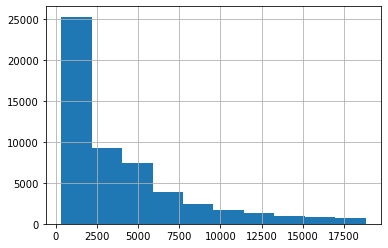

In [8]:
df['price'].hist()

### Checking for outliers:

In [9]:
dims = ['x', 'y', 'z']

Using a boxplot to visualize the concentration of data:

<AxesSubplot:>

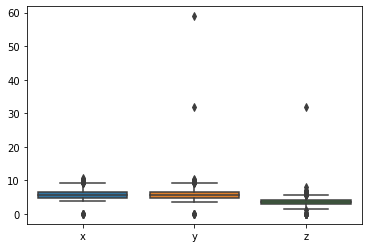

In [10]:
sns.boxplot(data = df[dims])

Defining interquartile ranges for each of the three parameters (x, y and z) and using that to filter outliers:

In [11]:
# for dim in dims:

#     q1 = df[dim].quantile(0.25)                 
#     q3 = df[dim].quantile(0.75)
#     iqr = q3 - q1

#     # Apply filter with respect to IQR, including optional whiskers
#     filter = (df[dim] >= q1 - iqr*1.5) & (df[dim] <= q3 + 1.5*iqr)
#     kd = df.loc[filter]

# kd.reset_index(inplace = True)

In [12]:
vol = []

for i in range(len(df)):
    vol.append((df.at[i, 'x'])*(df.at[i, 'y'])*(df.at[i, 'z']))

# vol

df.loc[:,'xyz'] = vol

In [13]:
for i in range(len(df)):
    if df.loc[i, 'xyz'] == 0:
        df.drop([i], inplace = True)

df.reset_index(inplace = True)

kd = df

In [14]:
kd

,index,carat,cut,color,clarity,depth,table,price,x,y,z,xyz
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53915,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53916,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53917,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53918,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


The filtered dataframe is named kd. Further analysis will be conducted on this dataframe.

### Univariate, bivariate and multivariate analysis

Analyzing a categorical parameter:

In [15]:
param = input('Enter a categorical parameter:  ')

Enter a categorical parameter:  cut


In [16]:
kd[param].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

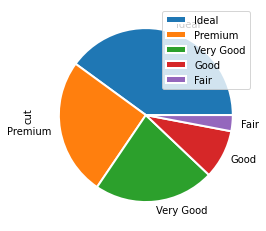

In [17]:
kd[param].value_counts().plot.pie(wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}, legend = True)
plt.show()

In [18]:
kd[param].describe()

count     53920
unique        5
top       Ideal
freq      21548
Name: cut, dtype: object

Understanding how one parameter relates to another:

In [19]:
x, y = input('Enter parameter 1:  '), input('Enter parameter 2:  ')

Enter parameter 1:  xyz
Enter parameter 2:  price


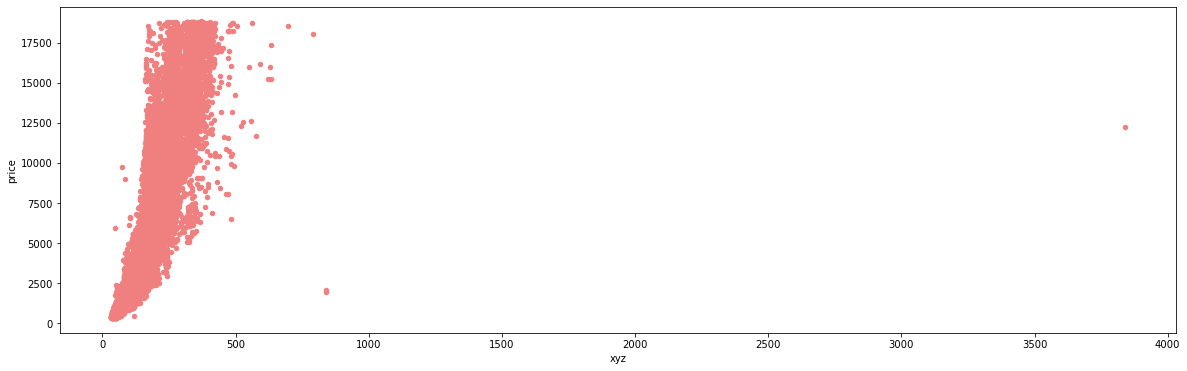

In [20]:
plt.rcParams['figure.figsize'] = (20, 6)

kd.plot.scatter(x, y, color = 'lightcoral')
plt.show()

Correlation plots:

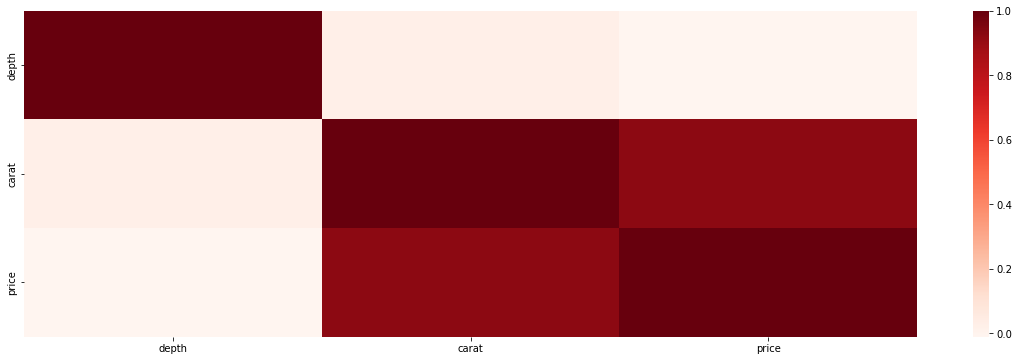

In [21]:
# kd[['depth', 'table', 'carat']].corr()

sns.heatmap(kd[['depth', 'carat', 'price']].corr(), annot = False, cmap = 'Reds')
plt.show()

Categorical-Numerical data analysis:

In [22]:
kd.groupby('cut')['price'].median()

cut
Fair         3282.0
Good         3050.5
Ideal        1809.5
Premium      3182.0
Very Good    2647.0
Name: price, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


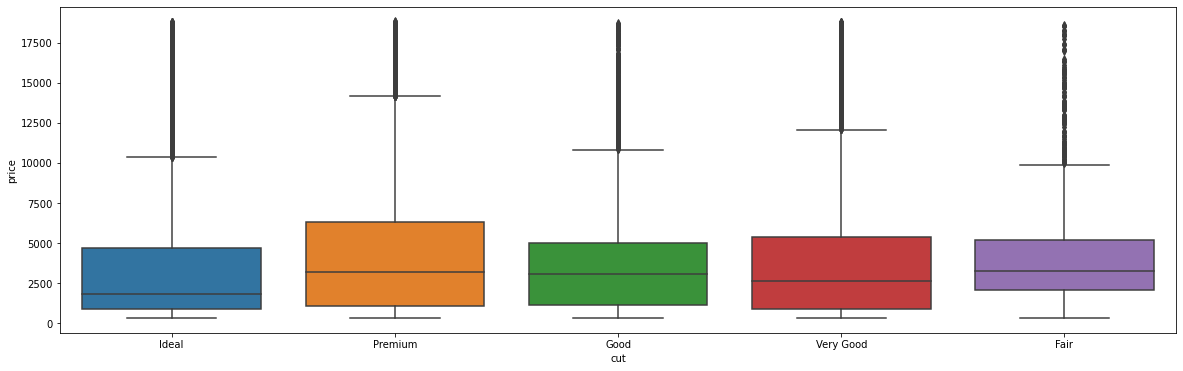

In [23]:
sns.boxplot(kd['cut'], kd['price'])
plt.show()

Pairplots:

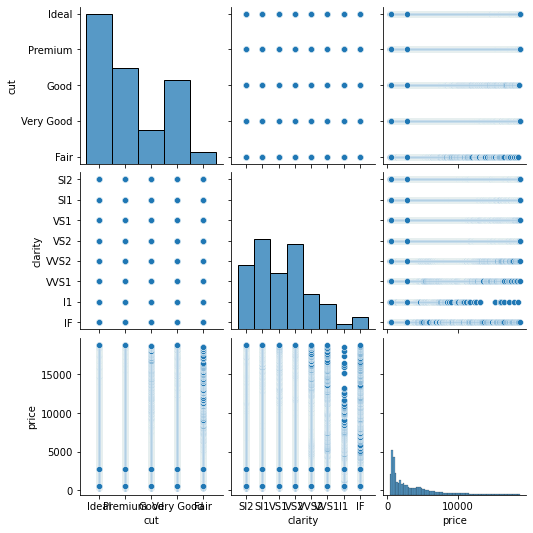

In [24]:
sns.pairplot(data = kd, vars = ['cut', 'clarity', 'price'])
plt.show()

Understanding how three parameters relate to one another:

In [27]:
i, c, v = input('Enter parameter 1:  '), input('Enter parameter 2:  '), 'price'

Enter parameter 1:  cut
Enter parameter 2:  clarity


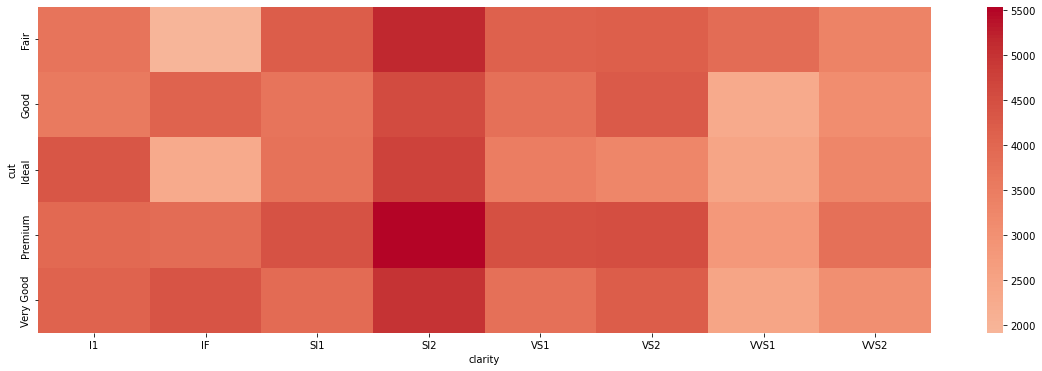

In [28]:
result = pd.pivot_table(data = kd, index = i, columns = c, values = v)

sns.heatmap(result, annot = False, cmap = 'coolwarm', center = 0.117)
plt.show()

### Observations:

Diamonds with a premium cut are expensive is amazing and so are those in colour J. Even though class SI2 is not the best when it comes to clarity, diamonds of SI2 clarity are also expensive. This suggests a possible correlation between clarity and another parameter upon which the price might be dependent. However, conclusive remarks cannot be made about the same at this point.

Greater the values of x, y and z, higher the price.

A heatmap of (carat, clarity, price) is a good indicator of the patterns and correlations.

Fair cut diamonds are expensive around the carat values 2 and 2.5.